[home](/MLcloud) | [amitkaps.com](http://amitkaps.com) | [bargava.com](http://bargava.com)


# Build & Deploy ML Models in Cloud

** Motivation for the Session**

- Solve a business problem
- Understand the end-to-end approach
- Build a data-driven Machine Learning application on the cloud

##### For code, go to [https://github.com/amitkaps/MLcloud](https://github.com/amitkaps/MLcloud)

** Our approach ** is to take a case-driven example to showcase this. And we will aim to go-wide vs. go-deep to do so. The approach will be both practical and scalable.


<br>

## INTRO


Lets start by understanding the overall approach for doing so.


```
                FRAME  ——> ACQUIRE  ——> REFINE ——>  
                                                  \
                                                TRANSFORM <——
                                                    ↑          ↘  
                                                    |        EXPLORE
                                                    ↓          ↗
                                                  MODEL   <——
                                                  /      
                BUILD <—— DEPLOY <—— INSIGHT <—— 

```



- **FRAME**: Problem definition
- **ACQUIRE**: Data ingestion 
- **REFINE**: Data wrangling
- **TRANSFORM**: Feature creation 
- **EXPLORE**: Feature selection 
- **MODEL**: Model creation
- **INSIGHT**: Model selection
- **DEPLOY**: Model deployment
- **BUILD**: Application building

<br>

## FRAME 

> "Doing data science requires more time thinking than doing."

A start-up providing loans to the consumer and has been running for the last few years. It is now planning to adopt a data-driven lens to its loan portfolio. What are the **type of questions** it can ask?
- What is the trend of loan defaults?
- Do older customers have more loan defaults?
- Which customer is likely to have a loan default?
- Why do customers default on their loan?


### Type of data-driven analytics
- **Descriptive**: Understand patterns, trends, deviations and outlier
- **Inquisitive**: Conduct hypothesis testing
- **Predictive**: Make a prediction
- **Causal**: Establish a causal link

**Our Question: What is the probability of a loan default?**

<br>

## ACQUIRE

> "Data is the new oil"

**Ways to acquire data** (typical data source)

- Download from an internal system
- Obtained from client, or other 3rd party
- Extracted from a web-based API
- Scraped from a website
- Extracted from a PDF file
- Gathered manually and recorded

**Data Formats**: flat files (e.g. csv, tsv, xls), databases (e.g. MySQL), streaming (e.g. json), storage (e.g. HDFS)

In [85]:
#Load the libraries and configuration
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [114]:
data = pd.read_csv("loan.csv") 
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


*Target*
- **default**: whether the applicant defaulted (1) or not (0)?

*Features* - Application Attributes
- **age**: age of the applicant
- **income**: annual income of the applicant
- **year**: no. of years of employment
- **ownership**: type of house owned
- **amount** : amount of loan requested by the applicant

*Features* - Behavioural Attributes:
- **grade**: credit grade of the applicant

<br>

## REFINE

> "Data is messy"

- **Remove** e.g. remove redundant data from the data frame
- **Derive** e.g. state and city from the location field
- **Parse** e.g. extract date from year and month column

Also, you need to check for consistency and quality of the data
- **Missing** e.g. Check for missing or incomplete data
- **Quality** e.g. Check for duplicates, accuracy, unusual data

Lets check for missing values in our data

In [115]:
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

### Handling missing values

- **REMOVE** - NaN rows or columns
- **IMPUTATE** - Replace them with something? mean, median, fixed number (based on domain) or high number (e..g 999, though could have issues later)
- **BIN** - Convert to categorical variable and "missing becomes a category"
- **DOMAIN SPECIFIC** - Entry error, pipeline, etc.

In our case, we will just drop the rows with missing NAs

In [116]:
data.dropna(axis=0, inplace=True) 

<br>

## TRANSFORM

> "What is measured may not help answer what is needed"

- **Convert** e.g. free text to coded value
- **Calculate** e.g. percentages, proportion
- **Merge** e.g. first and surname for full name
- **Aggregate** e.g. rollup by year, cluster by area
- **Filter** e.g. exclude based on location
- **Sample** e.g. extract a representative data
- **Summary** e.g. show summary stats like mean
- **Encoding** e.g. convert categorical variable - label, one-hot

In [117]:
data['default'] = df['default'].astype('category')

In [91]:
df['log_age'] = np.log(df.age)
df['log_income'] = np.log(df.income)

## EXPLORE

In [100]:
from plotnine import *
%matplotlib inline
from plotnine.themes import theme_538
plot = ggplot(df) + theme_538()

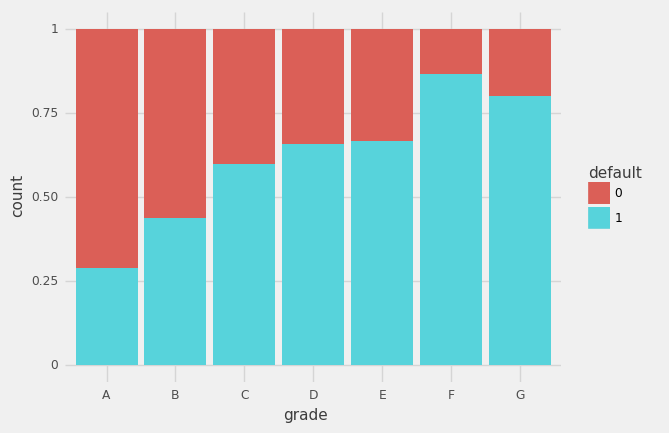

<ggplot: (296598322)>

In [106]:
plot + aes('grade', fill ="default") + geom_bar(position = 'fill')

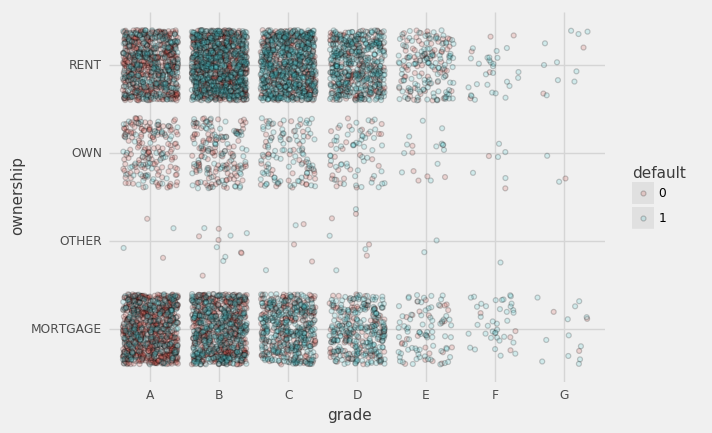

<ggplot: (-9223372036555466748)>

In [107]:
plot + aes('grade', 'ownership', fill ="default") + geom_jitter(alpha = 0.2)

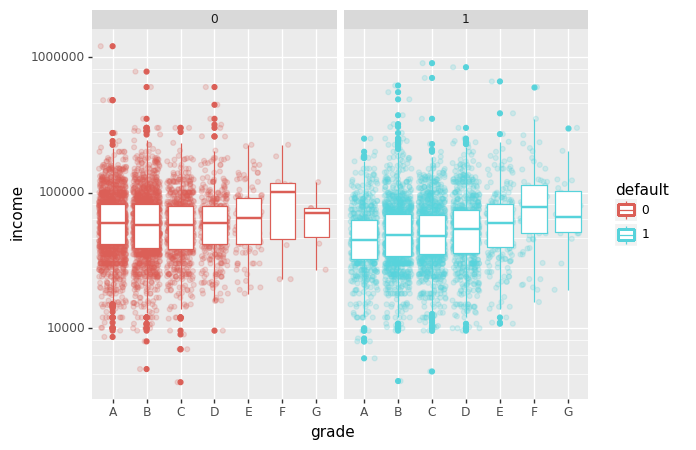

<ggplot: (-9223372036561380359)>

In [108]:
(
    ggplot(df) + 
    aes('grade', 'income', color = 'default') + 
    geom_jitter(alpha = 0.2) + geom_boxplot() +
    scale_y_log10() +
    facet_wrap('default')
)

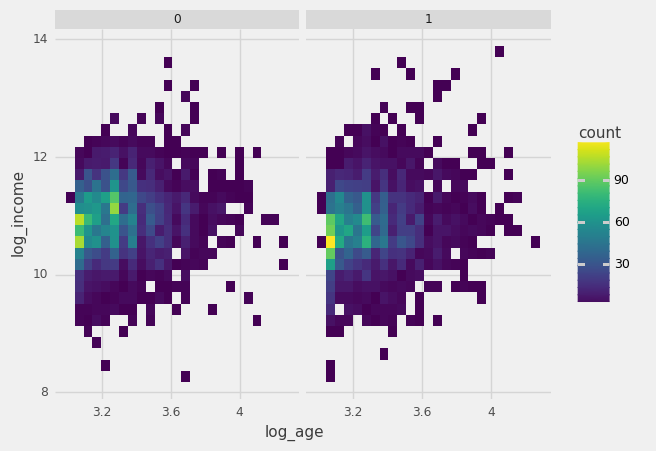

<ggplot: (301272310)>

In [109]:
plot + aes('log_age', 'log_income') + geom_bin2d() + facet_wrap('default')

## MODEL


> "All models are wrong, Some of them are useful"

- The power and limits of models
- Tradeoff between Prediction Accuracy and Model Interpretability
- Assessing Model Accuracy
- Regression models (Simple, Multiple)
- Classification model


- Build a tree classifier **

In [110]:
from sklearn import tree
from sklearn.externals import joblib
from firefly.client import Client

In [111]:
X = df.loc[:,('age', 'income')]
y = df.loc[:,'default']
clf = tree.DecisionTreeClassifier(max_depth=10).fit(X,y)
joblib.dump(clf, "clf.pkl")

['clf.pkl']

### ** Build - the ML API **

In [112]:
%%file simple.py
import numpy as np
from sklearn.externals import joblib
model = joblib.load("clf.pkl")

def predict(age, amount):
    features = [age, amount]
    prob0, prob1 = model.predict_proba([features])[0]
    return prob1

Writing simple.py


### ** Deploy - the ML API **

Run the following command in your terminal 

     cd credit-risk/notebooks/
     firefly simple.predict

### ** Interact - get prediction using API**

In [10]:
simple = Client("http://127.0.0.1:8000")
simple.predict(age=28, amount=10000)

0.5373423860329777

In [12]:
simple.predict(age=50, amount=240000)

1.0